In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'
# import plotly as py
# import plotly.graph_objs as go
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

%matplotlib inline

In [11]:
df = pd.read_csv("astro_objects.csv")

In [12]:
df.head()

,Unnamed: 0,plate,object_id,ra,dec,mag_B,mag_R,spectrum_class,spectrum_length,red_bord_position,9,10,11,12,13,14,15,16,fits_path
0,0,fbs0005,DFBSJ142114.64+425823.6,14:21:14.640,+42:58:23.63,13.86,13.15,OK,101,16,-2.189981e-11,-3.665937e-14,-9.373043e-12,-1.532294e-09,1.024176e-11,-2.280213e-14,2.109259e-17,-6.999758e-21,specimages/fbs0005-DFBSJ142114.64+425823.6.fits
1,1,fbs0005,DFBSJ142122.01+425921.3,14:21:22.012,+42:59:21.37,12.85,12.20,OK,106,13,-3.792762e-11,-3.647929e-14,-1.208479e-11,-1.865856e-09,1.801383e-11,-4.706942e-14,4.814870e-17,-1.724178e-20,specimages/fbs0005-DFBSJ142122.01+425921.3.fits
2,2,fbs0005,DFBSJ142125.68+425138.2,14:21:25.688,+42:51:38.29,16.38,14.85,NL,83,17,-1.815388e-11,-1.309881e-14,-3.936086e-12,-6.570811e-10,3.287456e-12,-6.007407e-15,4.796814e-18,-1.419620e-21,specimages/fbs0005-DFBSJ142125.68+425138.2.fits
3,3,fbs0005,DFBSJ142126.80+425301.4,14:21:26.802,+42:53:01.40,14.45,13.57,NL,120,17,-4.077909e-11,-2.942382e-14,-8.841611e-12,-1.475995e-09,8.681218e-12,-1.793400e-14,1.573814e-17,-5.009265e-21,specimages/fbs0005-DFBSJ142126.80+425301.4.fits
4,4,fbs0005,DFBSJ142141.43+430014.5,14:21:41.436,+43:00:14.59,16.39,16.47,NL,90,16,-1.024508e-12,-1.714980e-15,-4.384846e-13,-7.168274e-11,5.490072e-13,-1.330955e-15,1.317058e-18,-4.632790e-22,specimages/fbs0005-DFBSJ142141.43+430014.5.fits


In [13]:
X = df[["9", "10", "11", "12", "13", "14", "15", "16"]]

In [14]:
X.head()

,9,10,11,12,13,14,15,16
0,-2.189981e-11,-3.665937e-14,-9.373043e-12,-1.532294e-09,1.024176e-11,-2.280213e-14,2.109259e-17,-6.999758e-21
1,-3.792762e-11,-3.647929e-14,-1.208479e-11,-1.865856e-09,1.801383e-11,-4.706942e-14,4.814870e-17,-1.724178e-20
2,-1.815388e-11,-1.309881e-14,-3.936086e-12,-6.570811e-10,3.287456e-12,-6.007407e-15,4.796814e-18,-1.419620e-21
3,-4.077909e-11,-2.942382e-14,-8.841611e-12,-1.475995e-09,8.681218e-12,-1.793400e-14,1.573814e-17,-5.009265e-21
4,-1.024508e-12,-1.714980e-15,-4.384846e-13,-7.168274e-11,5.490072e-13,-1.330955e-15,1.317058e-18,-4.632790e-22


In [15]:
Sum_of_squared_distances = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

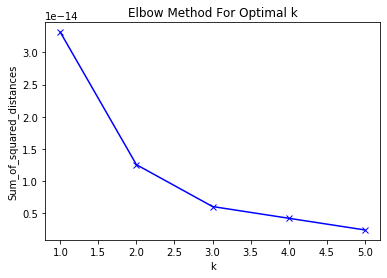

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [18]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,